목적: 와인의 품질 예측


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

wine = pd.read_csv('/content/wine.csv', encoding='ISO-8859-1')

In [ ]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
wine.head() #처음 5줄 데이터 출력

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


→quality 변수를 제외하고는 모든 변수가 수치형 데이터

In [ ]:
wine.isnull().sum() #열별 결측값 개수 확인

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

→ 모든 열에 결측치가 없음

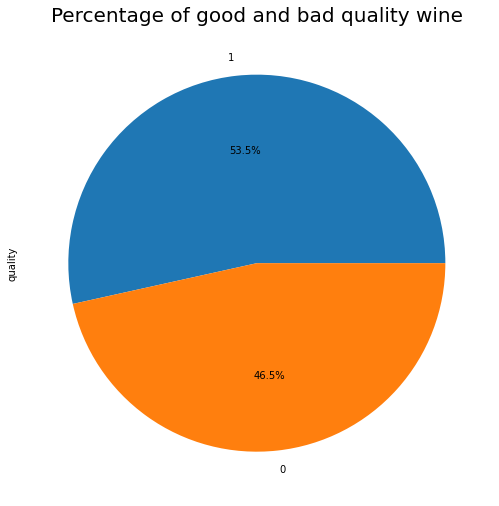

In [ ]:
plt.figure(figsize=(40,25)) #figsize는 figure의 사이즈를 말하며 inch 단위
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8) #x축 lablel과 제목이 겹칠 때 사용 #plt.subplots(constrained_layout = True)도 사용가능
plt.subplot(141) #subplot()은 현재 조작 중인 figure에 subplot을 만들어줌 #nrows=1, ncols=4, index=1
plt.title('Percentage of good and bad quality wine',fontsize = 20) #그래프의 제목과 사이즈 조절
wine['quality'].value_counts().plot.pie(autopct="%1.1f%%") #wine의 quality 중에서 고유값(bad, good) 별로 데이터 개수를 출력한 후 이를 pie plot으로 만듦 #autopct는 부채꼴 안에 표시될 숫자의 형식을 지정

→ quality가 'good'인 비율과 'bad'인 비율이 비슷함(불균형 자료가 아니기 때문에 처리 필요없음)

In [ ]:
wine['quality'].replace({'bad': 0 , 'good': 1}, inplace=True) #replace()는 문자열 안의 특정 문자열을 새로운 문자로 변경

→ 'bad'를 0으로, 'good'를 1로 이진분류로 바꿈

In [ ]:
wine.head() #wine의 quality가 숫자형으로 바뀐 것 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0




---



In [ ]:
Y = wine['quality'] #wine의 quality가 종속변수

In [ ]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
X = wine.drop(['quality'],axis = 1) #quliaty를 제외한 wine의 데이터가 입력변수

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #평균 0, 분산 1로 조정
training_set_scaled = sc.fit_transform(X) #train data에 있는 mean과 variance를 학습 #fit_transform()은 train dataset에서만 사용

→ StandardScaler를 하는 이유는 변수들의 단위 간 표준화 작업을 하기 위하여.

(변수 간의 영향력을 객관적으로 측정하여 종속변수에 끼치는 영향을 알기 위해서)

In [ ]:
num_val = 0.2
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, Y, test_size=num_val, random_state=23) #test_size는 테스트 데이터셋의 비율 #random_state는 데이터 분할 시 이루어지는 셔플을 위한 시드값

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=1000)

MLPClassifier

*   hidden_layer_sizes: 은닉층의 크기를 결정, (은닉층의 수, 뉴런의 개수)를 튜플로 받음
*   activation: 활성화 함수 지정, relu가 기본값
*   solver: 경사 하강법 알고리즘의 종류 지정, sgd가 기본값
*   alpha: 규제를 적용하기 위한 매개변수, L1보다 L2의 규제 효과가 크다

In [ ]:
# y_pred = mlp.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_train,predict_train) #confusion matrix: 타켓의 원래 클래스와 모형이 예측한 클래스가 일치하는 개수를 표로 나타냄
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[566  32]
 [ 30 651]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       598
           1       0.95      0.96      0.95       681

    accuracy                           0.95      1279
   macro avg       0.95      0.95      0.95      1279
weighted avg       0.95      0.95      0.95      1279




→ 클래스1('good')에 대해 정밀도가 95%, 재현율이 96%로 높음

→ 'good'이라고 판단해야하는 wine을 'bad'라고 판단할 확률 5%

→ 'bad'라고 판단해야하는 wine을 'good'이라고 판단할 확률 4%

Classification_Report 평가 지표


*   Precision(정밀도): 양성 클래스라고 예측한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율(높을수록 좋음)
*   Recall(재현율): 실제 양성 클래스에 속한 샘플 중 양성 클래스라고 예측한 샘플 수의 비율(높을수록 좋음)
*  F1-score: precision과 recall의 가중 조화평균
*  Support: 각 라벨의 실제 샘플 개수
*  macro avg: 평균에 평균을 내는 개념(샘플 개수의 불균형을 고려하지 않음)
*  weighted avg: 각 클래스에 속하는 표본의 개수로 개중 평균을 내서 계산(샘플 개수의 불균형을 고려함)



In [ ]:
mlp.predict([[7.4,	0.700,	0.00,	1.9,	0.076,	11.0,	34.0,	0.99780,	3.51,	0.56,	9.4]])

array([1])

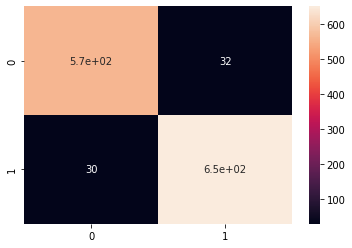

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
wine.corr() #수치형 변수 간의 상관관계 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


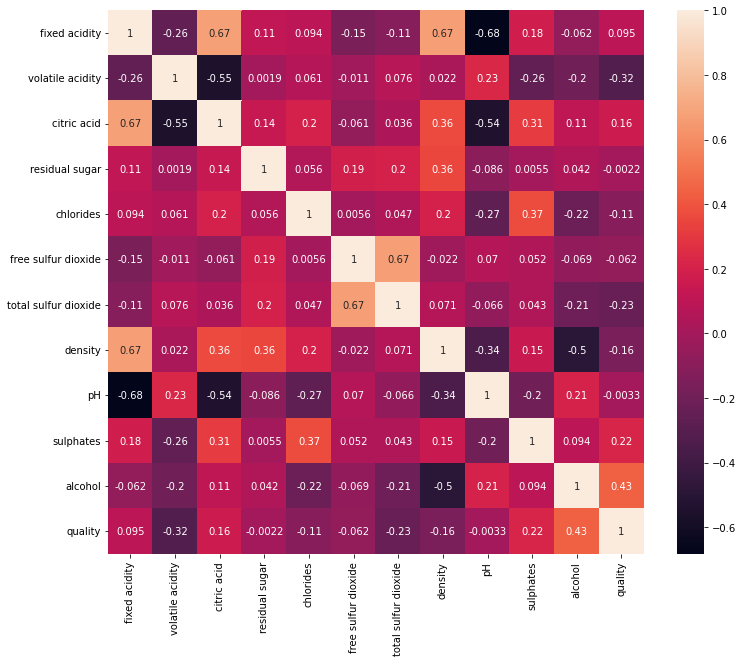

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

→ 변수들 간의 상관관계가 있는지를 확인해봄. 

*   citric acid-fixed acidity, density-fixed acidity, total sulfur dioxide-free sulfur dioxide 간의 높은 양의 상관관계 확인
*   pH-fixed acidity, citric acid-volatile acidity, pH-citric acid 사이의 음의 상관관계 확인


